In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt

base_path = "DS"
eeg_labels = [
    "F3","F1","Fz","F2","F4","FFC5h","FFC3h","FFC1h","FFC2h","FFC4h","FFC6h",
    "FC5","FC3","FC1","FCz","FC2","FC4","FC6","FTT7h","FCC5h","FCC3h","FCC6h",
    "FTT8h","C5","C3","C1","Cz","C2","C4","C6","TTP7h",
    "CCP5h","CCP3h","CCP1h","CCP2h","CCP4h","CCP6h","TTP8h","CP5","CP3","CP1",
    "CPz","CPP5h","CPP3h","CPP1h","CPP2h","CPP4h","CPP6h","P3","P1","Pz","P2","P4","PPO1h",
    "PPO2h"
]

events_required = [1,2,5,6]

# ─── 1) Load one example file to inspect sampling rate and events ──────────
gdf_path = "DS/S2_MI/motorimagination_subject2_run3.gdf"
# Load the raw data without preloading to inspect events
raw = mne.io.read_raw_gdf(gdf_path, preload=True)
# 3) Intersect with the channels actually present in the file
present = set(raw.info['ch_names'])
to_keep = [ch for ch in eeg_labels if ch in present]
# 4) Pick only those
raw.pick_channels(to_keep)
#filter noise 
raw.filter(l_freq=0.5, h_freq=50)
# Pick EEG channels defined by eeg_labels
print(f"Shape of the data (EEG only): {raw.get_data().shape}")
# Check the number of channels
print(f"Number of channels (EEG only): {len(raw.ch_names)}")
# Check the channel names
print(f"Channel names (EEG only): {raw.ch_names}")

Extracting EDF parameters from d:\CP Solves\CP Solves\EEG_Classifications\DS\S2_MI\motorimagination_subject2_run3.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
F3, F1, Fz, F2, F4, FFC5h, FFC3h, FFC1h, FFC2h, FFC4h, FFC6h, FC5, FC3, FC1, FCz, FC2, FC4, FC6, FTT7h, FCC5h, FCC3h, FCC1h, FCC2h, FCC4h, FCC6h, FTT8h, C5, C3, C1, Cz, C2, C4, C6, TTP7h, CCP5h, CCP3h, CCP1h, CCP2h, CCP4h, CCP6h, TTP8h, CP5, CP3, CP1, CPz, CP2, CP4, CP6, CPP5h, CPP3h, CPP1h, CPP2h, CPP4h, CPP6h, P3, P1, Pz, P2, P4, PPO1h, PPO2h, eog-l, eog-m, eog-r, thumb_near, thumb_far, thumb_index, index_near, index_far, index_middle, middle_near, middle_far, middle_ring, ring_near, ring_far, ring_little, litte_near, litte_far, thumb_palm, wrist_bend, roll, pitch, gesture, handPosX, handPosY, handPosZ, elbowPosX, elbowPosY, elbowPosZ, ShoulderAdductio, ShoulderFlexionE, ShoulderRotation, Elbow, ProSupination, Wrist, GripPressure


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [35]:
# Check the sampling rate
print(f"Sampling rate: {raw.info['sfreq']} Hz")

Sampling rate: 512.0 Hz


In [36]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: F3, F1, Fz, F2, F4, FFC5h, FFC3h, FFC1h, FFC2h, FFC4h, FFC6h, ...
 chs: 55 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 50.0 Hz
 meas_date: 2015-06-26 08:44:21 UTC
 nchan: 55
 projs: []
 sfreq: 512.0 Hz
 subject_info: <subject_info | his_id: dj3, sex: 0, last_name: , birthday: 0001-01-01>
>

In [37]:
print(raw.info['ch_names'])

['F3', 'F1', 'Fz', 'F2', 'F4', 'FFC5h', 'FFC3h', 'FFC1h', 'FFC2h', 'FFC4h', 'FFC6h', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FTT7h', 'FCC5h', 'FCC3h', 'FCC6h', 'FTT8h', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'TTP7h', 'CCP5h', 'CCP3h', 'CCP1h', 'CCP2h', 'CCP4h', 'CCP6h', 'TTP8h', 'CP5', 'CP3', 'CP1', 'CPz', 'CPP5h', 'CPP3h', 'CPP1h', 'CPP2h', 'CPP4h', 'CPP6h', 'P3', 'P1', 'Pz', 'P2', 'P4', 'PPO1h', 'PPO2h']


In [39]:
# 2. Extract annotations and events
annotations = raw.annotations
print("\nAnnotations:\n", annotations)


Annotations:
 <Annotations | 294 segments: 1536 (6), 1537 (6), 1538 (6), 1539 (6), 1540 ...>


In [40]:
#no. of events and unique event types
events, event_id = mne.events_from_annotations(raw)

Used Annotations descriptions: ['1536', '1537', '1538', '1539', '1540', '1541', '1542', '33536', '33554', '34304', '34305', '34306', '34307', '34308', '34309', '34310', '768', '785', '786']


In [41]:
# Check the sampling rate per event
for event in events:
    event_type = event[2]
    event_time = event[0] / raw.info['sfreq']
    print(f"Event: {event_type}, Time: {event_time:.2f} seconds")

Event: 17, Time: 5.00 seconds
Event: 18, Time: 5.00 seconds
Event: 19, Time: 5.00 seconds
Event: 2, Time: 7.00 seconds
Event: 8, Time: 10.00 seconds
Event: 9, Time: 10.00 seconds
Event: 11, Time: 10.00 seconds
Event: 17, Time: 12.43 seconds
Event: 18, Time: 12.43 seconds
Event: 19, Time: 12.43 seconds
Event: 3, Time: 14.43 seconds
Event: 8, Time: 17.43 seconds
Event: 9, Time: 17.43 seconds
Event: 12, Time: 17.43 seconds
Event: 17, Time: 19.89 seconds
Event: 18, Time: 19.89 seconds
Event: 19, Time: 19.89 seconds
Event: 1, Time: 21.89 seconds
Event: 8, Time: 24.89 seconds
Event: 9, Time: 24.89 seconds
Event: 10, Time: 24.89 seconds
Event: 17, Time: 27.54 seconds
Event: 18, Time: 27.54 seconds
Event: 19, Time: 27.54 seconds
Event: 5, Time: 29.54 seconds
Event: 8, Time: 32.54 seconds
Event: 9, Time: 32.54 seconds
Event: 14, Time: 32.54 seconds
Event: 17, Time: 34.98 seconds
Event: 18, Time: 34.98 seconds
Event: 19, Time: 34.98 seconds
Event: 1, Time: 36.98 seconds
Event: 8, Time: 39.98 sec

In [42]:
#frequency of events
event_counts = {}
for event in events:
    event_type = event[2]
    if event_type not in event_counts:
        event_counts[event_type] = 0
    event_counts[event_type] += 1
print("\nEvent counts:")
for event_type, count in event_counts.items():
    print(f"{event_type}: {count} occurrences")


Event counts:
17: 42 occurrences
18: 42 occurrences
19: 42 occurrences
2: 6 occurrences
8: 42 occurrences
9: 42 occurrences
11: 6 occurrences
3: 6 occurrences
12: 6 occurrences
1: 6 occurrences
10: 6 occurrences
5: 6 occurrences
14: 6 occurrences
4: 6 occurrences
13: 6 occurrences
6: 6 occurrences
15: 6 occurrences
7: 6 occurrences
16: 6 occurrences


In [43]:
# Map numeric event codes 1536–1542 to labels 1–7
code_to_label = {code: idx+1 for idx, code in enumerate(sorted(event_id.values()))}
# 2) Count occurrences for events 1–7
labels = [code_to_label[code] for code in events[:,2] if code in code_to_label]
counts = {label: labels.count(label) for label in sorted(set(labels))}
print("\nEvent counts for labels :", counts)


Event counts for labels : {1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6, 7: 6, 8: 42, 9: 42, 10: 6, 11: 6, 12: 6, 13: 6, 14: 6, 15: 6, 16: 6, 17: 42, 18: 42, 19: 42}


In [44]:
#define the window size
tmin = -1.5
tmax = 1.0   
# Create epochs only for events of interest
# Create a list of events for the required event IDs
# The events are already in the correct format, so we can directly use them
epochs = mne.Epochs(raw, events, events_required, tmin, tmax, baseline=(None, 0), preload=True, event_repeated='merge')  
# Check the number of epochs created
print(f"\nNumber of epochs created: {len(epochs)}")
# Check the shape of the data
# The shape of the data is (n_epochs, n_channels, n_times)
print(f"Shape of the data: {epochs.get_data().shape}")
# Check the number of channels
# The number of channels is equal to the number of EEG labels
print(f"Number of channels: {len(epochs.ch_names)}")
# Check the channel names
print(f"Channel names: {epochs.ch_names}")
# Check the event IDs
print(f"Event IDs: {epochs.event_id}")

Not setting metadata
24 matching events found
Setting baseline interval to [-1.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 1281 original time points ...
0 bad epochs dropped

Number of epochs created: 24
Shape of the data: (24, 55, 1281)
Number of channels: 55
Channel names: ['F3', 'F1', 'Fz', 'F2', 'F4', 'FFC5h', 'FFC3h', 'FFC1h', 'FFC2h', 'FFC4h', 'FFC6h', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FTT7h', 'FCC5h', 'FCC3h', 'FCC6h', 'FTT8h', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'TTP7h', 'CCP5h', 'CCP3h', 'CCP1h', 'CCP2h', 'CCP4h', 'CCP6h', 'TTP8h', 'CP5', 'CP3', 'CP1', 'CPz', 'CPP5h', 'CPP3h', 'CPP1h', 'CPP2h', 'CPP4h', 'CPP6h', 'P3', 'P1', 'Pz', 'P2', 'P4', 'PPO1h', 'PPO2h']
Event IDs: {'1': 1, '2': 2, '5': 5, '6': 6}


In [45]:
#trials of each event
# Create a dictionary to store the trials for each event
trials = {event: [] for event in events_required}
# Iterate through the epochs and store the trials for each event
for i in range(len(epochs)):
    event_id = epochs.events[i, 2]
    if event_id in trials:
        trials[event_id].append(epochs[i])
# Print the number of trials for each event
for event, trial_list in trials.items():
    print(f"Event {event}: {len(trial_list)} trials")
# Print the shape of the trial for each event
for event, trial_list in trials.items():
    if trial_list:
        print(f"Event {event}: Shape of first trial: {trial_list[0].get_data().shape}")
    else:
        print(f"Event {event}: No trials available")


Event 1: 6 trials
Event 2: 6 trials
Event 5: 6 trials
Event 6: 6 trials
Event 1: Shape of first trial: (1, 55, 1281)
Event 2: Shape of first trial: (1, 55, 1281)
Event 5: Shape of first trial: (1, 55, 1281)
Event 6: Shape of first trial: (1, 55, 1281)


In [46]:
#check trials for each event
for event, trial_list in trials.items():
    print(f"Event {event}:")
    for i, trial in enumerate(trial_list):
        print(f"  Trial {i+1}: Shape: {trial.get_data().shape}")
        print(f"  Data: {trial.get_data()}")
        print(f"  Time vector: {trial.times}")
        print(f"  Event ID: {trial.events[0][2]}")
        print(f"  Annotations: {trial.annotations}")
        print()


Event 1:
  Trial 1: Shape: (1, 55, 1281)
  Data: [[[-20.00782681 -16.23147526 -11.02976886 ... -39.63156061 -42.06178442
   -44.49342034]
  [-20.48506375 -17.88187143 -14.04142815 ... -47.57069544 -48.84097852
   -50.12051073]
  [-20.58671633 -18.23802352 -14.69018212 ... -45.18524155 -46.42798946
   -47.7716935 ]
  ...
  [ -2.15686108  -1.97106066  -1.50718156 ...  -6.6916515   -7.49863408
    -8.69106116]
  [-11.23814665 -10.73419908 -10.59452046 ... -11.5539199  -11.96588606
   -12.31634284]
  [ -7.9373943   -8.11295924  -8.29721377 ... -10.75758095 -11.10111364
   -11.63277671]]]
  Time vector: [-1.5        -1.49804688 -1.49609375 ...  0.99609375  0.99804688
  1.        ]
  Event ID: 1
  Annotations: <Annotations | 294 segments: 1536 (6), 1537 (6), 1538 (6), 1539 (6), 1540 ...>

  Trial 2: Shape: (1, 55, 1281)
  Data: [[[-12.08937862 -12.06521697 -12.31834051 ...   4.38062429   2.368784
     0.76739166]
  [-10.08313453  -9.71554935  -9.74079757 ...   3.65134493   2.00379644
     0.

In [47]:
import numpy as np

# trials: dict[label] → array of shape (n_trials_label, n_channels, n_times)
labels = sorted(trials.keys())  # e.g. [1,2,5,6]

X_list = []
y_list = []

for lab in labels:
    data = np.array([epoch.get_data() for epoch in trials[lab]])  # Extract data from Epochs objects
    X_list.append(data)
    y_list.append(np.full(data.shape[0], lab, dtype=int))

# concatenate along the epoch axis
X = np.concatenate(X_list, axis=0)           # (total_trials, n_ch, n_t)
y = np.concatenate(y_list, axis=0)           # (total_trials,)

print("Combined X shape:", X.shape)
print("Combined y shape:", y.shape)
print("Unique labels in y:", np.unique(y))


Combined X shape: (24, 1, 55, 1281)
Combined y shape: (24,)
Unique labels in y: [1 2 5 6]


In [48]:
import numpy as np

labels = sorted(trials.keys())  # [1,2,3,4,5,6,7]
X_list, y_list = [], []

for lab in labels:
    for epoch in trials[lab]:               # epoch is an MNE Epochs object
        arr = epoch.get_data()[0]           # shape → (n_channels, n_times)
        X_list.append(arr)
        y_list.append(lab)

# Now stack into your final arrays
X = np.stack(X_list, axis=0)               # (42, 55, 1281)
y = np.array(y_list, dtype=int)            # (42,)

print("Final X shape:", X.shape)
print("Final y shape:", y.shape)


Final X shape: (24, 55, 1281)
Final y shape: (24,)


In [49]:
import numpy as np
import pandas as pd

# X: your (n_epochs, n_channels, n_times) array
X_filled = X.copy()
n_epochs, n_ch, n_t = X_filled.shape

# 1) Channel‐wise median time‐series over all epochs
#    shape → (n_channels, n_times)
median_ts = np.nanmedian(X_filled, axis=0)

# 2) Replace any all‐NaN or all‐zero channel in an epoch
for i in range(n_epochs):
    for c in range(n_ch):
        slice_ = X_filled[i, c, :]
        if np.all(np.isnan(slice_)) or np.all(slice_ == 0):
            X_filled[i, c, :] = median_ts[c, :]

# 3) Fill remaining NaNs/zeros via centered rolling mean
for i in range(n_epochs):
    for c in range(n_ch):
        ts = X_filled[i, c, :].astype(float)
        # mark zeros and NaNs as missing
        ts[(ts == 0) | np.isnan(ts)] = np.nan
        # rolling‐mean (window=5) to fill
        s = pd.Series(ts)
        rolled = s.rolling(window=5, min_periods=1, center=True).mean()
        # fallback: fill any still‐NaN with that channel’s scalar median
        rolled.fillna(np.median(median_ts[c]), inplace=True)
        X_filled[i, c, :] = rolled.values

# 4) Verification
print("Any all-NaN channels left? ",
      np.any(np.all(np.isnan(X_filled), axis=2)))
print("Any all-zero channels left? ",
      np.any(np.all(X_filled == 0,      axis=2)))
print("Any NaNs at all? ", np.isnan(X_filled).any())
print("Any zeros at all? ", np.any(X_filled == 0))


Any all-NaN channels left?  False
Any all-zero channels left?  False
Any NaNs at all?  False
Any zeros at all?  False


In [50]:
print(X_filled.shape)
print(y.shape)

(24, 55, 1281)
(24,)


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_welch


# ─── PSD parameters ─────────────────────────────────────────────────────────
sfreq = 512.0
fmin, fmax = 0.5, 50.0
n_fft = 256
events = np.unique(y)
n_ch = X_filled.shape[1]

# ─── Compute PSD per event & per channel ────────────────────────────────────
psd_per_event = {}
for ev in events:
    idx = np.where(y == ev)[0]
    psd_ev = []
    for ch in range(n_ch):
        # psds: (n_trials_ev, n_freqs)
        psds, freqs = psd_array_welch(
            X_filled[idx, ch, :], sfreq=sfreq,
            fmin=fmin, fmax=fmax,
            n_fft=n_fft,
            average='mean'
        )
        psd_ev.append(psds.mean(axis=0))
    psd_per_event[ev] = np.vstack(psd_ev)  # (n_channels, n_freqs)

# ─── Plot PSD for every channel, overlaying events ──────────────────────────
n_cols = 8
n_rows = int(np.ceil(n_ch / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 2*n_rows),
                         sharex=True, sharey=True)
axes = axes.flatten()

for ch in range(n_ch):
    ax = axes[ch]
    for ev in events:
        ax.plot(freqs, psd_per_event[ev][ch], label=f"Evt{ev}", linewidth=0.7)
    ax.set_title(eeg_labels[ch], fontsize=6)
    ax.set_xlim(fmin, fmax)
    if ch == 0:
        ax.legend(fontsize=5, loc='upper right')
for ax in axes[n_ch:]:
    ax.axis('off')

fig.suptitle("PSD per Channel by Event", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective wind

KeyboardInterrupt: 

# Elbow Flexion/Extension: C3, C1, FC3, CP1, CP3
# Claw-Close/Claw-Open: C3, C1

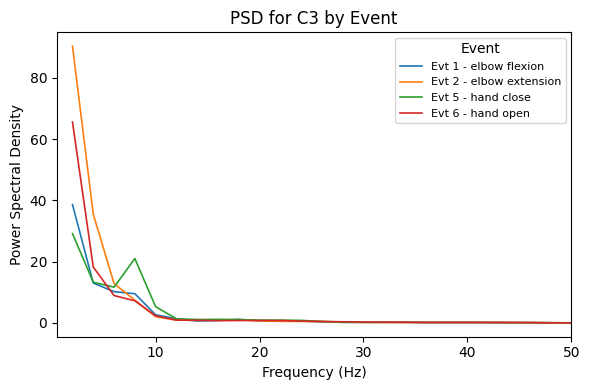

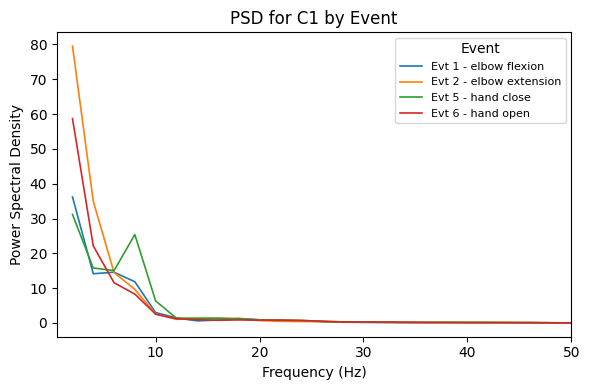

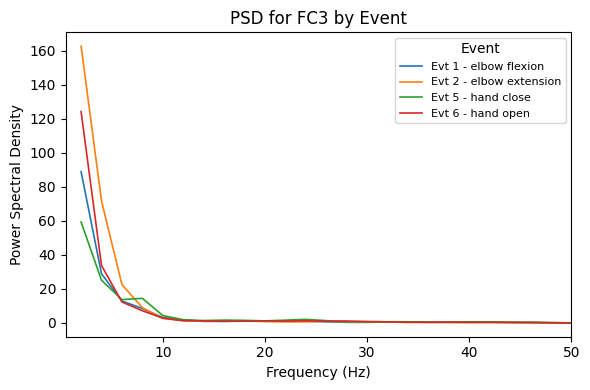

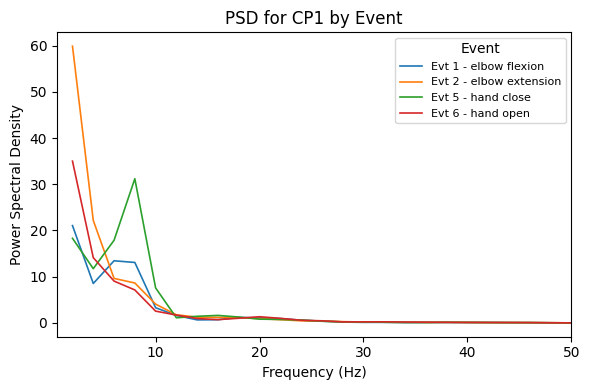

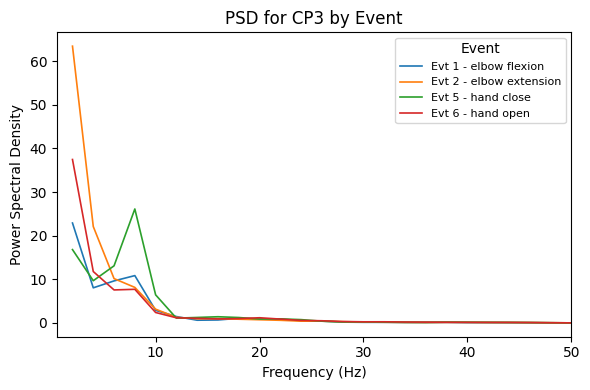

In [ ]:

events_name = {1: "elbow flexion", 2: "elbow extension", 5: "hand close", 6: "hand open"}
channels = eeg_labels
for ch_name in ["C3","C1", "FC3", "CP1", "CP3"]:
    if ch_name not in channels:
        print(f"Channel {ch_name} not found, skipping")
        continue
    ch_idx = channels.index(ch_name)
    plt.figure(figsize=(6,4))
    for ev in events:
        plt.plot(freqs, psd_per_event[ev][ch_idx],
                 label=f"Evt {ev} - {events_name.get(ev, 'unknown')}", linewidth=1.2)
    plt.title(f"PSD for {ch_name} by Event")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density")
    plt.xlim(fmin, fmax)
    plt.legend(title="Event", fontsize=8)
    plt.tight_layout()
    plt.show()

Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)


C:\Users\ik111\AppData\Local\Temp\ipykernel_9664\1025339414.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=[f"Evt{ev}" for ev in events], showfliers=False)


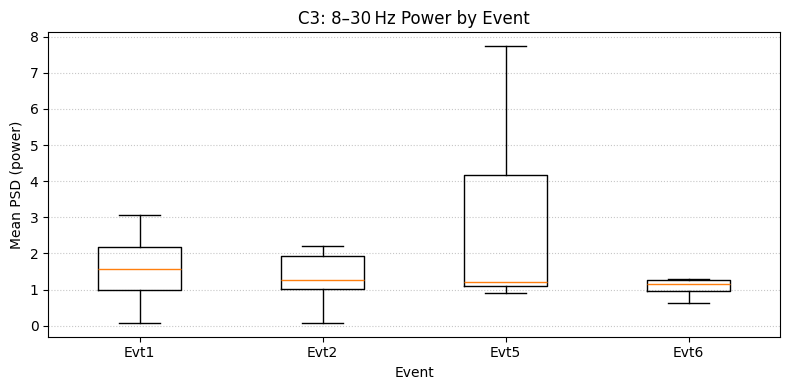

C:\Users\ik111\AppData\Local\Temp\ipykernel_9664\1025339414.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=[f"Evt{ev}" for ev in events], showfliers=False)


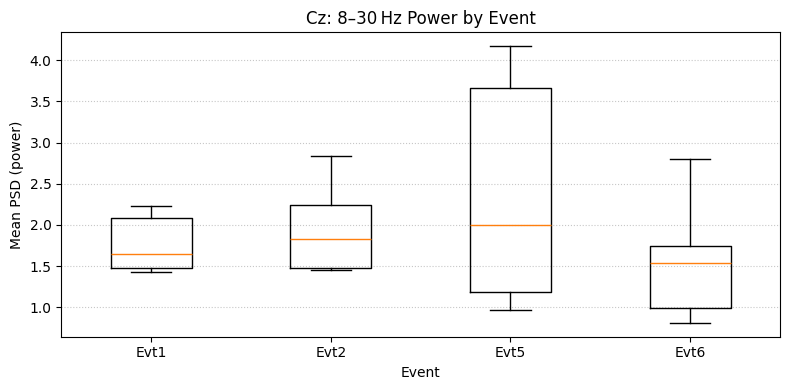

C:\Users\ik111\AppData\Local\Temp\ipykernel_9664\1025339414.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=[f"Evt{ev}" for ev in events], showfliers=False)


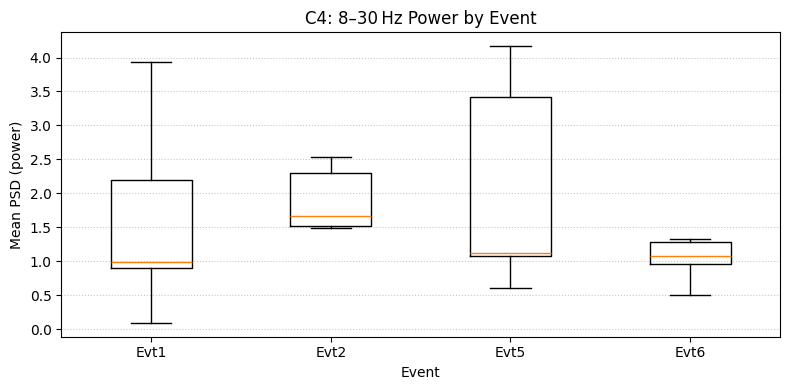

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_welch

# ─── Prerequisite: X_list (list of (n_ch, n_times)) and y_list (list of labels 1–7)
X = np.stack(X_filled, axis=0)    # (n_epochs, n_ch, n_times)
y = np.array(y, dtype=int) # (n_epochs,)
# ─── Settings ───────────────────────────────────────────────────────────────
channels_of_interest = ['C3', 'Cz', 'C4']
sfreq = 512.0
n_fft = 256
# choose frequency band for boxplot (e.g. beta: 13–30 Hz)
band = (8, 30)

events = np.unique(y)

# ─── Compute band‐power per trial for each channel & event ───────────────────
power_data = {ch: {ev: [] for ev in events} for ch in channels_of_interest}

for ch in channels_of_interest:
    ch_idx = eeg_labels.index(ch)
    # extract time-series for this channel across epochs
    data_ch = X[:, ch_idx, :]  # shape (n_epochs, n_times)
    # compute PSD per epoch
    psds, freqs = psd_array_welch(
        data_ch, sfreq=sfreq,
        fmin=band[0], fmax=band[1],
        n_fft=n_fft, average='mean'
    )  # returns (n_epochs, n_freqs), (n_freqs,)
    # for each epoch, compute mean power across the band
    band_power_per_epoch = psds.mean(axis=1)  # shape (n_epochs,)
    # assign to events
    for ev in events:
        idx = np.where(y == ev)[0]
        power_data[ch][ev] = band_power_per_epoch[idx]

# ─── Plot a boxplot for each channel ─────────────────────────────────────────
for ch in channels_of_interest:
    data_to_plot = [power_data[ch][ev] for ev in events]
    plt.figure(figsize=(8,4))
    plt.boxplot(data_to_plot, labels=[f"Evt{ev}" for ev in events], showfliers=False)
    plt.title(f"{ch}: {band[0]}–{band[1]} Hz Power by Event")
    plt.xlabel("Event")
    plt.ylabel("Mean PSD (power)")
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
from mne.time_frequency import psd_array_welch

# X has shape (n_epochs, n_channels, n_times), y has labels 1…7
bands = {"mu": (8,12), "beta": (13,30)}
psd_feats = np.zeros((X_filled.shape[0], X_filled.shape[1], len(bands)))  # (epochs, channels, bands)

for i in range(X_filled.shape[0]):
    for ch in range(X_filled.shape[1]):
        psd, freqs = psd_array_welch(X_filled[i,ch,:], sfreq=512,
                                     fmin=8, fmax=30, n_fft=256)
        for b_idx, (fmin,fmax) in enumerate(bands.values()):
            mask = (freqs>=fmin)&(freqs<=fmax)
            psd_feats[i,ch,b_idx] = psd[mask].mean()

Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective wind

Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)
Effective window size : 0.500 (s)


C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1344954104.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=[f"Evt{ev}" for ev in events], showfliers=False)
C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1344954104.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=[f"Evt{ev}" for ev in events], showfliers=False)
C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1344954104.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=[f"Evt{ev}" for ev in events], showfliers=False)
C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1344954104.py:

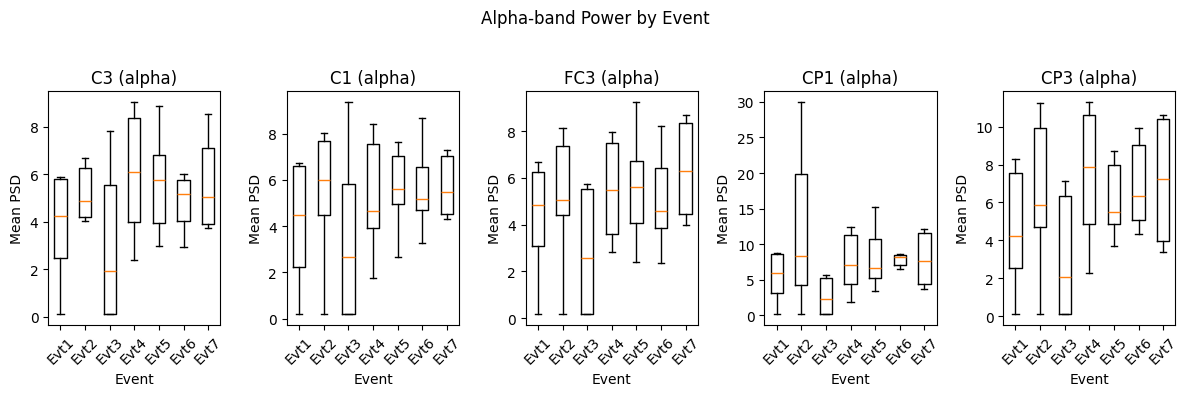

C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1344954104.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=[f"Evt{ev}" for ev in events], showfliers=False)
C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1344954104.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=[f"Evt{ev}" for ev in events], showfliers=False)
C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1344954104.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=[f"Evt{ev}" for ev in events], showfliers=False)
C:\Users\ik111\AppData\Local\Temp\ipykernel_11812\1344954104.py:

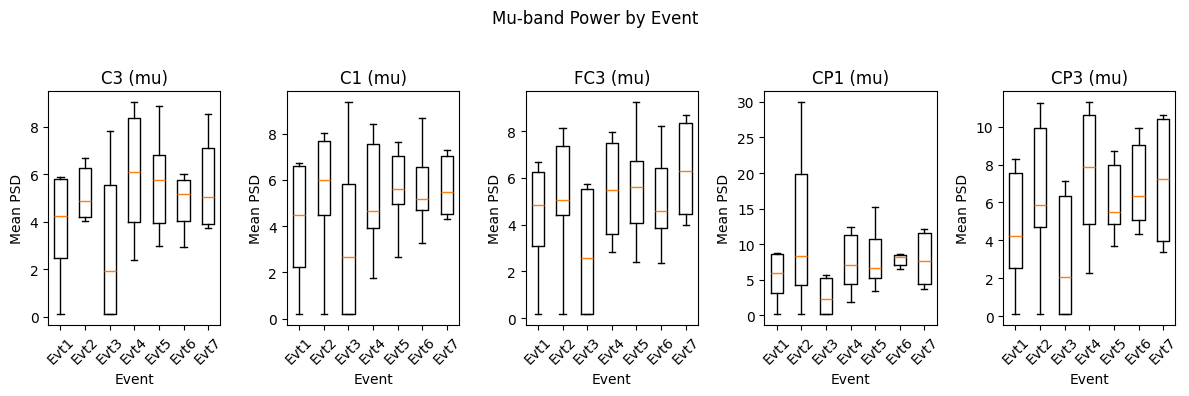

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_welch

# ─── Prerequisite: X_list (list of (n_ch, n_times) arrays) and y_list (labels 1–7)
X = np.stack(X_filled, axis=0)   # (n_epochs, n_ch, n_times)
y = np.array(y)           # (n_epochs,)

# ─── 1) Define bands: alpha (8–12 Hz) and mu (8–13 Hz motor) ───────────────
bands = {'alpha': (8, 12), 'mu': (8, 13)}

sfreq = 512.0
n_fft = 256
events = np.unique(y)
channels = eeg_labels     # full channel list
ch_interest = ["C3","C1", "FC3", "CP1", "CP3"]

# ─── 2) Compute per-trial band-power for each band & channel ───────────────
power_data = {
    band: {ch: {} for ch in ch_interest}
    for band in bands
}

for band_name, (fmin, fmax) in bands.items():
    for ch_name in ch_interest:
        ch_idx = channels.index(ch_name)
        # compute PSD for all trials at this channel
        psds, freqs = psd_array_welch(
            X[:, ch_idx, :],
            sfreq=sfreq,
            fmin=fmin, fmax=fmax,
            n_fft=n_fft,
            average='mean'
        )  # psds shape: (n_epochs, n_freqs)
        band_power = psds.mean(axis=1)  # mean over freq axis → (n_epochs,)
        # group by event
        for ev in events:
            power_data[band_name][ch_name][ev] = band_power[y == ev]

# ─── 3) Plot boxplots ──────────────────────────────────────────────────────
for band_name in bands:
    fig, axes = plt.subplots(1, len(ch_interest), figsize=(12, 4))
    for ax, ch_name in zip(axes, ch_interest):
        data = [power_data[band_name][ch_name][ev] for ev in events]
        ax.boxplot(data, labels=[f"Evt{ev}" for ev in events], showfliers=False)
        ax.set_title(f"{ch_name} ({band_name})")
        ax.set_xlabel("Event")
        ax.set_ylabel("Mean PSD")
        ax.tick_params(axis='x', rotation=45)
    fig.suptitle(f"{band_name.capitalize()}-band Power by Event")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


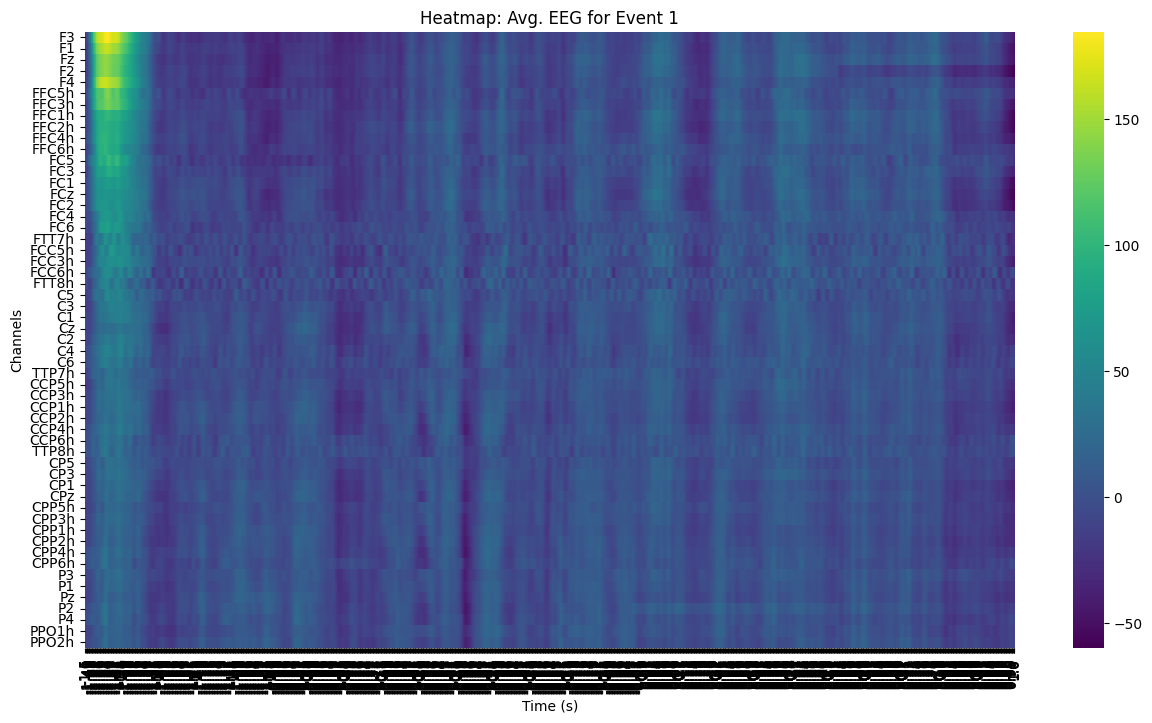

In [55]:
import seaborn as sns

event = events_required[0]
ev_epochs = epochs[event]
avg_data = ev_epochs.get_data().mean(axis=0)  # average over trials

plt.figure(figsize=(15, 8))
sns.heatmap(avg_data, xticklabels=np.round(ev_epochs.times,2), yticklabels=ev_epochs.ch_names, cmap='viridis')
plt.title(f'Heatmap: Avg. EEG for Event {event}')
plt.xlabel('Time (s)')
plt.ylabel('Channels')
plt.show()


NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
No baseline correction applied


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


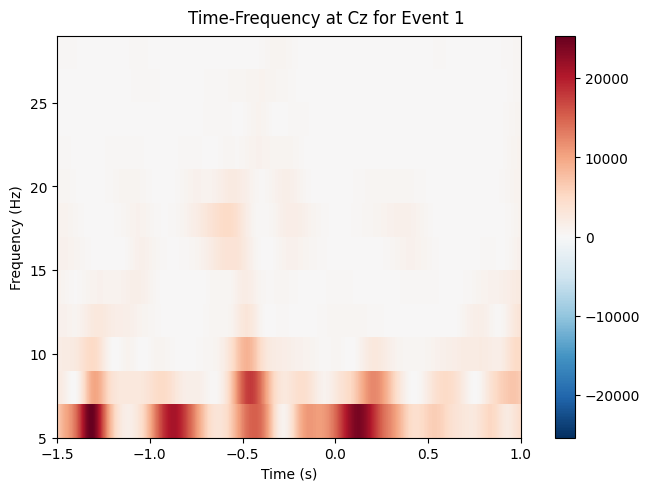

[<Figure size 640x480 with 2 Axes>]

In [56]:
from mne.time_frequency import tfr_morlet

freqs = np.arange(6, 30, 2)  # frequencies of interest
n_cycles = freqs / 2.0        # different number of cycles per frequency

event = events_required[0]
ev_epochs = epochs[event]

power = tfr_morlet(ev_epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=False)
power.plot([raw.ch_names.index('Cz')], title=f'Time-Frequency at Cz for Event {event}')
